## 1. Understand the data.
<p>In this project, we will delve into the exciting journey of machine learning by applying predictive analytics to solve a real-world problem: health monitorig application. In this experiment, we will demonstrate in building and evaluating machine learning models using Python and popular libraries such as scikit-learn, numpy, pandas , matplotlib and seaborn.</p>
<p>Step 1: As usual, understanding the data is the first step of our health monitoring application project.</p>

In [2]:
# Importing the pandas package
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

#Importing the one hot encoding


# Reading in condo.csv, which is comma delimited.
# df=pd.read_csv('condo.csv', index_col = 0)
df=pd.read_csv('../dataset/health_data.csv')

df.info()





<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   User_ID         300 non-null    int64  
 1   Age             300 non-null    int64  
 2   Gender          300 non-null    int64  
 3   Weight_kg       300 non-null    float64
 4   Height_cm       300 non-null    float64
 5   SpO2            300 non-null    float64
 6   BPM             300 non-null    float64
 7   Recommendation  300 non-null    int64  
dtypes: float64(4), int64(4)
memory usage: 18.9 KB


## 2. Select the Featres and target.
<p>In this part, we define the features and target</p>


In [3]:
# Define features and target
X = df[['Age', 'Gender', 'Weight_kg', 'Height_cm', 'SpO2', 'BPM']]
y = df['Recommendation']

## 3. Splitting Dataset
<p> Data splitting, also known as data partitioning or data splitting, is a crucial step in machine learning model development. It involves dividing a dataset into multiple subsets for different purposes, typically training and testing/validation.</p>

In [4]:
# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


## 4. Train the model using Random Forest 
<p> A Random Forest is a popular and powerful supervised machine learning algorithm used for both classification and regression tasks </p>

In [5]:
# Train a Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

## 5. Evaluation with the test dataset
<p> Evaluating the performance of the trained classification model is crucial for assessing model fit, detecting overfitting, understanding prediction accuracy, comparing models, iteratively improving the model, and establishing baseline performance.</p>

In [9]:
# Predictions
y_pred = model.predict(X_test)

# Evaluate model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
print(classification_report(y_test, y_pred))

Accuracy: 0.98
              precision    recall  f1-score   support

           0       1.00      0.92      0.96        13
           1       0.98      1.00      0.99        47

    accuracy                           0.98        60
   macro avg       0.99      0.96      0.97        60
weighted avg       0.98      0.98      0.98        60



## 6. Confusion Matrix
<t> True Positive |
Ture Negative |
False Positive | 
False Negative </t>

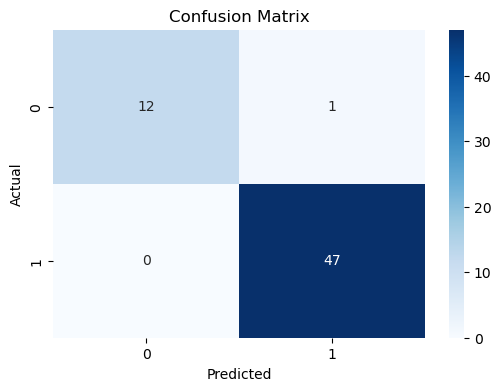

In [10]:

# Confusion Matrix
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
